# **Convolutional Neural Network**

# **For binary class classification**

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [23]:
tf.__version__

'2.13.0'

### Importing the libraries

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [24]:
train_data_gen=ImageDataGenerator(rescale=1/255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [25]:
training_data_Set=train_data_gen.flow_from_directory("/content/drive/MyDrive/training_set",
                                                     target_size=(64,64),
                                                     batch_size=32,
                                                     class_mode="binary")

Found 8429 images belonging to 2 classes.


### Preprocessing the Test set

In [26]:
testing_data_gen=ImageDataGenerator(rescale=1/255)

In [27]:
testing_data_set=testing_data_gen.flow_from_directory("/content/drive/MyDrive/test_set",
                                                      target_size=(64,64),
                                                      batch_size=32,
                                                      class_mode="binary")

Found 173 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [28]:
cnn=tf.keras.models.Sequential()

### Step 1 - Convolution

In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=32,
                               kernel_size=3,
                               activation="relu",
                               input_shape=[64,64,3]))

### Step 2 - Pooling

In [30]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

### Adding a second convolutional layer

In [31]:
cnn.add(tf.keras.layers.Conv2D(filters=32,
                               kernel_size=3,
                               activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))

### Step 3 - Flattening

In [32]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [33]:
cnn.add(tf.keras.layers.Dense(units=128,activation="relu"))

### Step 5 - Output Layer

In [34]:
cnn.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
""" units = units=1 for binary classification, activation_function=sigmoid for binary classification
    units = No:of_classes for binary classification, activation_function=softmax for binary classification
"""

' units = units=1 for binary classification, activation_function=sigmoid for binary classification\n    units = No:of_classes for binary classification, activation_function=softmax for binary classification\n'

## Part 3 - Training the CNN

### Compiling the CNN

In [36]:
cnn.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

### Training the CNN on the Training set and evaluating it on the Test set

In [39]:
cnn.fit(x=training_data_Set,validation_data=testing_data_set,epochs=25)

Epoch 1/25
264/264 [==============================] - 120s 456ms/step - loss: 0.5453 - accuracy: 0.7210 - val_loss: 0.9295 - val_accuracy: 0.5202
Epoch 2/25
264/264 [==============================] - 70s 262ms/step - loss: 0.5135 - accuracy: 0.7477 - val_loss: 0.8599 - val_accuracy: 0.5896
Epoch 3/25
264/264 [==============================] - 75s 285ms/step - loss: 0.4980 - accuracy: 0.7590 - val_loss: 0.8193 - val_accuracy: 0.5723
Epoch 4/25
264/264 [==============================] - 70s 265ms/step - loss: 0.4741 - accuracy: 0.7660 - val_loss: 0.5411 - val_accuracy: 0.6994
Epoch 5/25
264/264 [==============================] - 72s 272ms/step - loss: 0.4570 - accuracy: 0.7834 - val_loss: 0.8903 - val_accuracy: 0.5607
Epoch 6/25
264/264 [==============================] - 72s 274ms/step - loss: 0.4477 - accuracy: 0.7929 - val_loss: 0.4563 - val_accuracy: 0.7399
Epoch 7/25
264/264 [==============================] - 73s 275ms/step - loss: 0.4322 - accuracy: 0.7988 - val_loss: 0.2696 - val_a

## Part 4 - Making a single prediction

1/1 [==============================] - 0s 26ms/step
cat


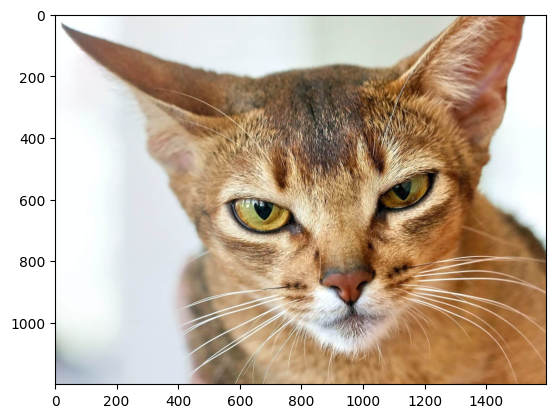

In [48]:
from keras.src.utils import load_img
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
test_image=image.load_img("/content/drive/MyDrive/single_prediction_cat.jpeg",target_size=(64,64))
plt.imshow(image.load_img("/content/drive/MyDrive/single_prediction_cat.jpeg"))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)
training_data_Set.class_indices
if result[0][0]==1:
  print("dog")
else:
  print("cat")